### **IONOSPHERE Dataset classification using SVM, MLP and Random Forest classifier**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

url = 'https://raw.githubusercontent.com/Aqeel-0/phone.html/master/ionosphere_data.csv'
df = pd.read_csv(url)
df.head()
#column_names = list(df.columns.values)

### **Pre Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 0:-1]
y = df.iloc[: , -1]
le = LabelEncoder()
encoded = le.fit_transform(df['column_ai'])
df.drop("column_ai", axis=1, inplace=True)
df["column_ai"] = encoded
y = df["column_ai"]
dict_svm = {}
dict_mlp = {}
dict_rfr = {}
RocAucSvm = {}
RocAucMlp = {}
RocAucRfr = {}
y.info(), X.info()
y.value_counts()


### **Used for ploting confusion matrix**

In [34]:
def plot(y_test, y_pred):
  from sklearn.metrics import confusion_matrix  
  import seaborn as sns
  
  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Pos','False Pos','False Neg','True neg']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  print("**********************************************")


In [35]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report, confusion_matrix
  plot(y_test, y_pred)
  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### **SVM CLASSIFIER**

In [36]:
def SVMClassifier(split, kernalValue = 'rbf', degreeValue = 3, gammaValue = 'scale', maxIter = -1):
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = SVC(kernel = kernalValue, degree = degreeValue, gamma = gammaValue, max_iter = maxIter)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if str(split) in dict_svm:
    dict_svm[str(split)] = max(accuracy, dict_svm[str(split)])
    if str(split) == '0.3' and accuracy > dict_svm[str(split)]:
      RocAucSvm['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_svm[str(split)] = accuracy
    if str(split) == '0.3':
      RocAucSvm['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)



Confusion Matrix : 


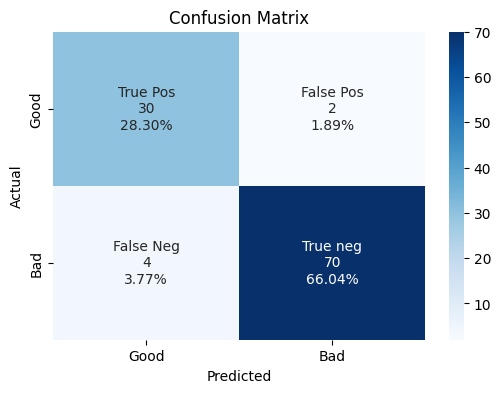

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.97      0.95      0.96        74

    accuracy                           0.94       106
   macro avg       0.93      0.94      0.93       106
weighted avg       0.95      0.94      0.94       106

Confusion Matrix : 


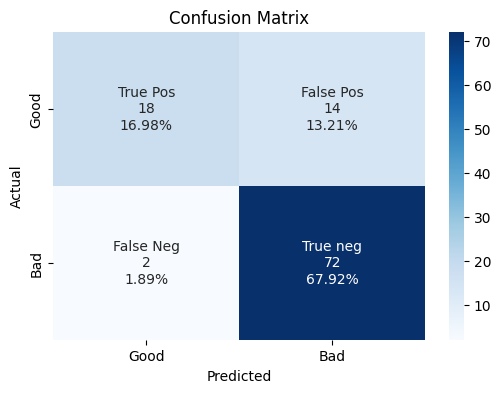

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        32
           1       0.84      0.97      0.90        74

    accuracy                           0.85       106
   macro avg       0.87      0.77      0.80       106
weighted avg       0.86      0.85      0.84       106

Confusion Matrix : 


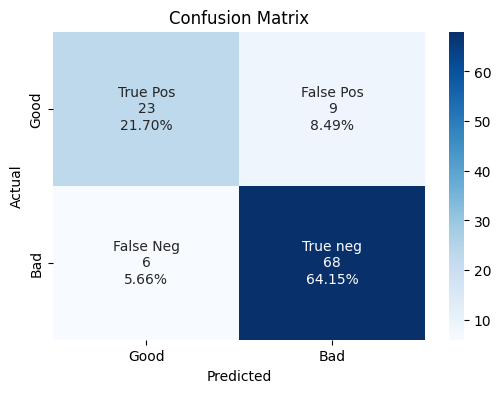

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.88      0.92      0.90        74

    accuracy                           0.86       106
   macro avg       0.84      0.82      0.83       106
weighted avg       0.86      0.86      0.86       106

Confusion Matrix : 


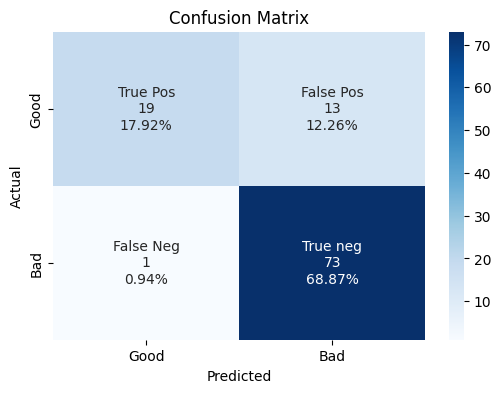

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.95      0.59      0.73        32
           1       0.85      0.99      0.91        74

    accuracy                           0.87       106
   macro avg       0.90      0.79      0.82       106
weighted avg       0.88      0.87      0.86       106



In [37]:
#Train - Test split 70-30
SVMClassifier(0.3, 'rbf', 3, 0.42)
SVMClassifier(0.3, 'linear', 3, 0.1)
SVMClassifier(0.3, 'poly', 5, )
SVMClassifier(0.3, 'sigmoid',3, 0.01)

Confusion Matrix : 


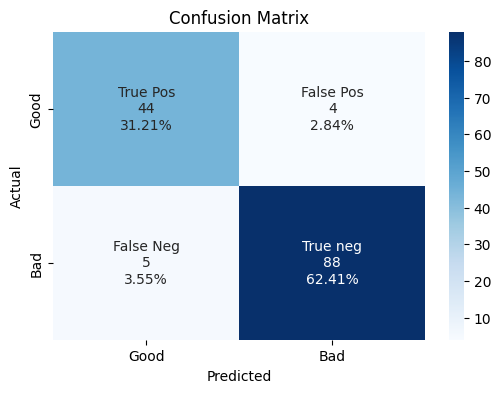

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        48
           1       0.96      0.95      0.95        93

    accuracy                           0.94       141
   macro avg       0.93      0.93      0.93       141
weighted avg       0.94      0.94      0.94       141

Confusion Matrix : 


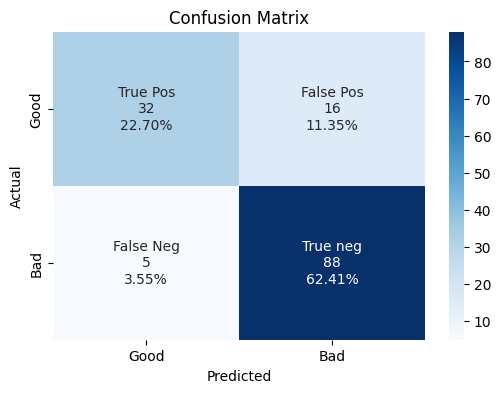

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        48
           1       0.85      0.95      0.89        93

    accuracy                           0.85       141
   macro avg       0.86      0.81      0.82       141
weighted avg       0.85      0.85      0.85       141

Confusion Matrix : 


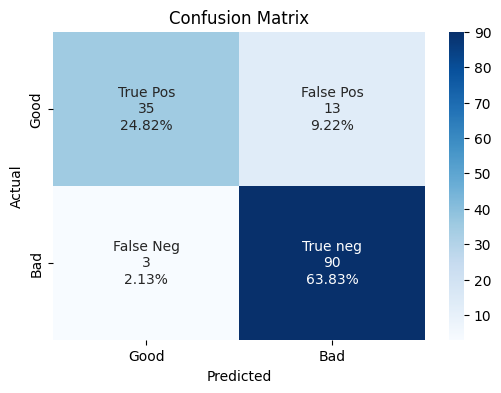

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        48
           1       0.87      0.97      0.92        93

    accuracy                           0.89       141
   macro avg       0.90      0.85      0.87       141
weighted avg       0.89      0.89      0.88       141

Confusion Matrix : 


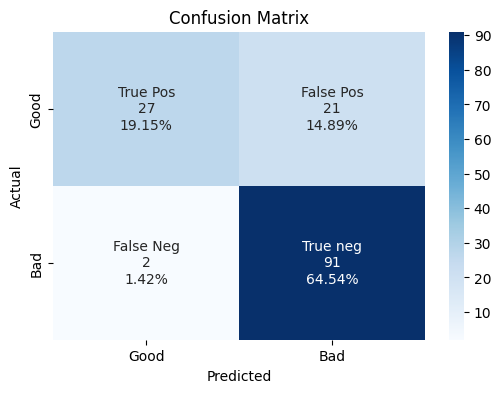

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      0.56      0.70        48
           1       0.81      0.98      0.89        93

    accuracy                           0.84       141
   macro avg       0.87      0.77      0.79       141
weighted avg       0.85      0.84      0.82       141



In [38]:
#Train - Test split 60-40
SVMClassifier(0.4, 'rbf', 3, 0.31)
SVMClassifier(0.4, 'linear', 3, 0.01)
SVMClassifier(0.4, 'poly', 5, )
SVMClassifier(0.4, 'sigmoid', 3, 0.01)

Confusion Matrix : 


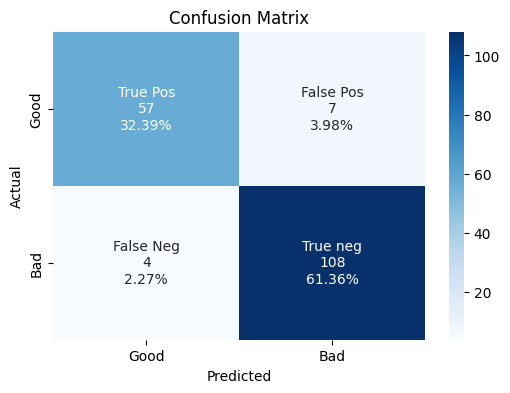

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        64
           1       0.94      0.96      0.95       112

    accuracy                           0.94       176
   macro avg       0.94      0.93      0.93       176
weighted avg       0.94      0.94      0.94       176

Confusion Matrix : 


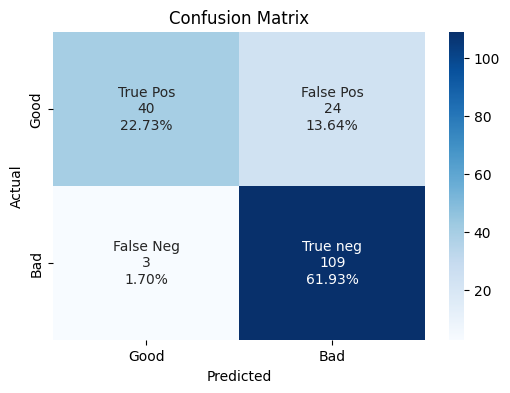

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      0.62      0.75        64
           1       0.82      0.97      0.89       112

    accuracy                           0.85       176
   macro avg       0.87      0.80      0.82       176
weighted avg       0.86      0.85      0.84       176

Confusion Matrix : 


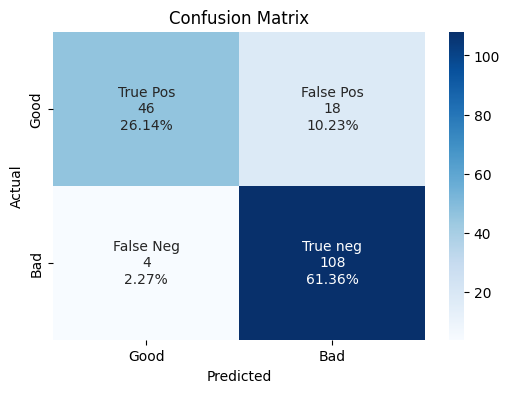

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        64
           1       0.86      0.96      0.91       112

    accuracy                           0.88       176
   macro avg       0.89      0.84      0.86       176
weighted avg       0.88      0.88      0.87       176

Confusion Matrix : 


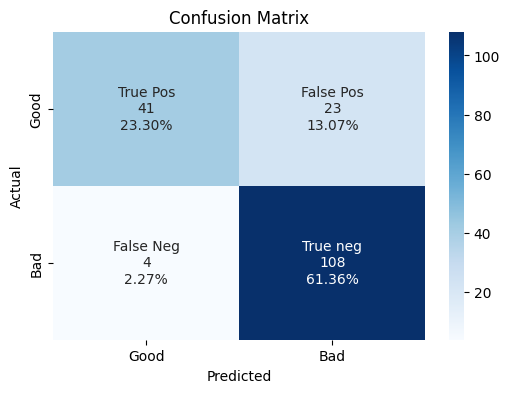

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.91      0.64      0.75        64
           1       0.82      0.96      0.89       112

    accuracy                           0.85       176
   macro avg       0.87      0.80      0.82       176
weighted avg       0.86      0.85      0.84       176



In [39]:
#Train - Test split 50-50
SVMClassifier(0.5, 'rbf', 3, 0.18)
SVMClassifier(0.5, 'linear', 3, )
SVMClassifier(0.5, 'poly', 4, )
SVMClassifier(0.5, 'sigmoid', 3, 0.09 ) #wrost performance

Confusion Matrix : 


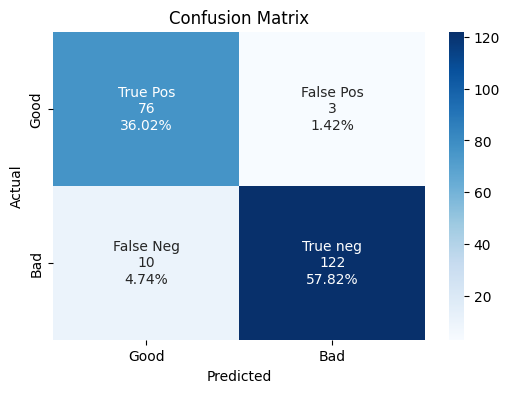

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        79
           1       0.98      0.92      0.95       132

    accuracy                           0.94       211
   macro avg       0.93      0.94      0.94       211
weighted avg       0.94      0.94      0.94       211

Confusion Matrix : 


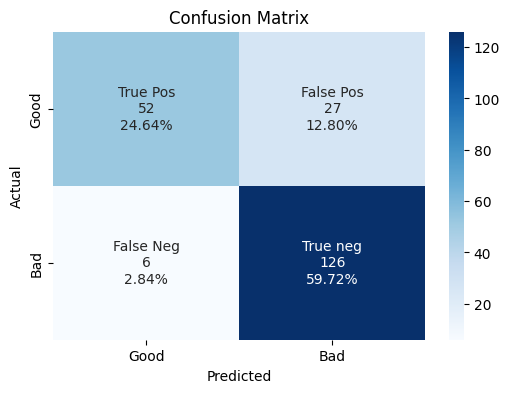

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.66      0.76        79
           1       0.82      0.95      0.88       132

    accuracy                           0.84       211
   macro avg       0.86      0.81      0.82       211
weighted avg       0.85      0.84      0.84       211

Confusion Matrix : 


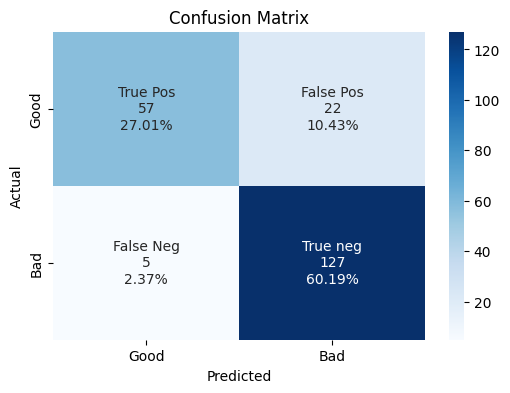

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        79
           1       0.85      0.96      0.90       132

    accuracy                           0.87       211
   macro avg       0.89      0.84      0.86       211
weighted avg       0.88      0.87      0.87       211

Confusion Matrix : 


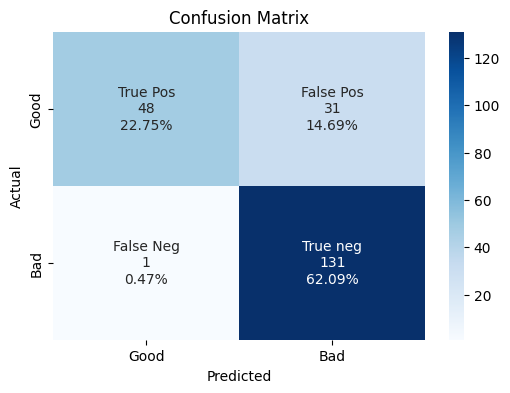

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.98      0.61      0.75        79
           1       0.81      0.99      0.89       132

    accuracy                           0.85       211
   macro avg       0.89      0.80      0.82       211
weighted avg       0.87      0.85      0.84       211



In [40]:
#Train - Test split 40-60
SVMClassifier(0.6, 'rbf', 3, 0.51)
SVMClassifier(0.6, 'linear', 3, )
SVMClassifier(0.6, 'poly', 2, 0.14)
SVMClassifier(0.6, 'sigmoid', 3,) #wrost performance

Confusion Matrix : 


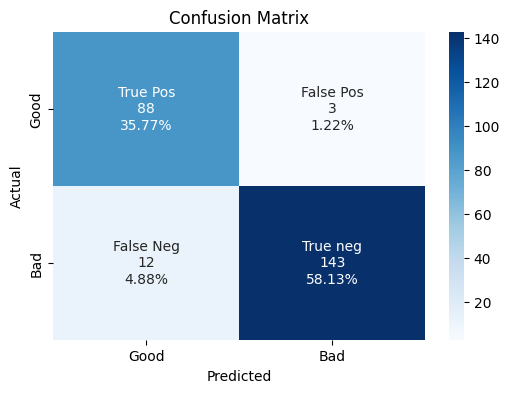

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        91
           1       0.98      0.92      0.95       155

    accuracy                           0.94       246
   macro avg       0.93      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246

Confusion Matrix : 


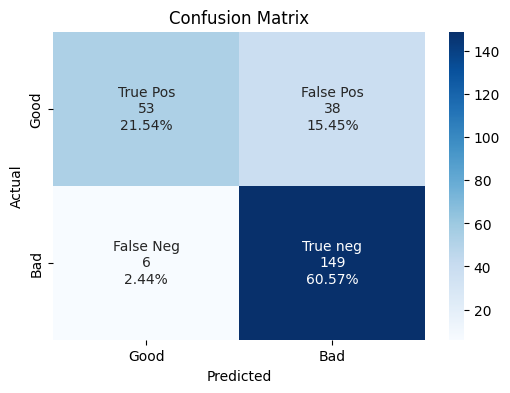

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.58      0.71        91
           1       0.80      0.96      0.87       155

    accuracy                           0.82       246
   macro avg       0.85      0.77      0.79       246
weighted avg       0.83      0.82      0.81       246

Confusion Matrix : 


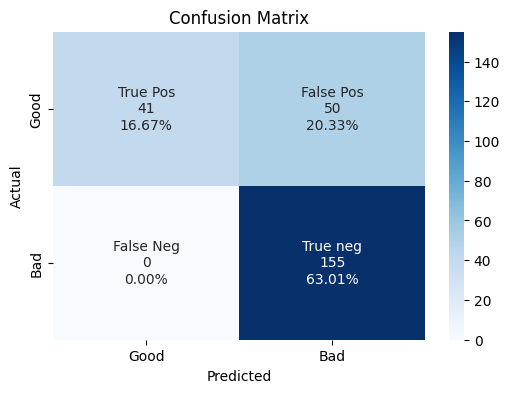

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        91
           1       0.76      1.00      0.86       155

    accuracy                           0.80       246
   macro avg       0.88      0.73      0.74       246
weighted avg       0.85      0.80      0.77       246

Confusion Matrix : 


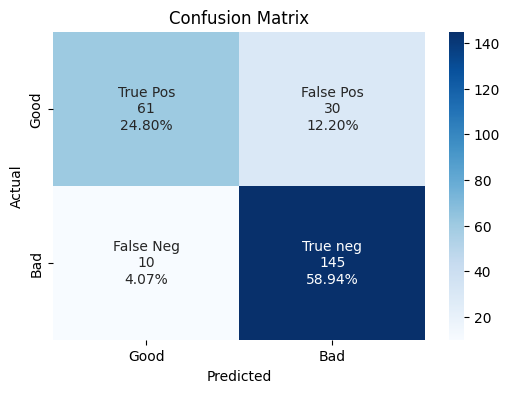

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        91
           1       0.83      0.94      0.88       155

    accuracy                           0.84       246
   macro avg       0.84      0.80      0.82       246
weighted avg       0.84      0.84      0.83       246



In [41]:
#Train - Test split 30-70
SVMClassifier(0.7, 'rbf', 3, 0.64)
SVMClassifier(0.7, 'linear')
SVMClassifier(0.7, 'poly', 2,)
SVMClassifier(0.7, 'sigmoid' ) #wrost performance

### **split vs accuracy graph**

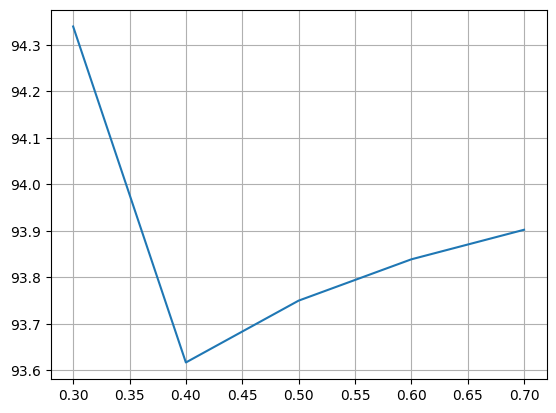

In [42]:
x_points = [float(key) for key in dict_svm]
y_points = [i*100 for i in dict_svm.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **MLP Classifier**

In [43]:
def MLPClassifier(split, hiddenLayerSize = [100, ], activationValue = 'relu', solverValue = 'adam'):
  from sklearn.model_selection import train_test_split
  from sklearn.neural_network import MLPClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = MLPClassifier(hidden_layer_sizes = hiddenLayerSize, activation = activationValue, solver = solverValue, random_state = 1)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  if(str(split) in dict_mlp):
    dict_mlp[str(split)] = max(accuracy, dict_mlp[str(split)])
    if(str(split) == '0.3' and accuracy > dict_svm[str(split)]):
      RocAucMlp['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_mlp[str(split)] = accuracy
    RocAucMlp['max'] = {'y_test': y_test, 'y_pred': y_pred}
  
  reports(y_test, y_pred)

/home/aqeel/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix : 


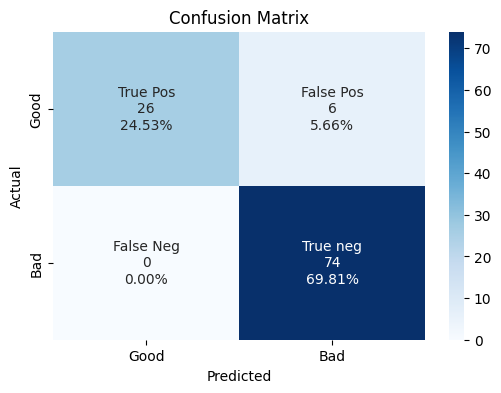

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.93      1.00      0.96        74

    accuracy                           0.94       106
   macro avg       0.96      0.91      0.93       106
weighted avg       0.95      0.94      0.94       106



In [44]:
#Train - Test split 70-30
MLPClassifier(0.3, [80, 20])

/home/aqeel/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix : 


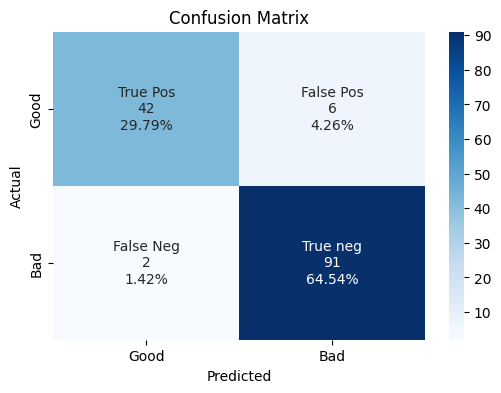

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        48
           1       0.94      0.98      0.96        93

    accuracy                           0.94       141
   macro avg       0.95      0.93      0.94       141
weighted avg       0.94      0.94      0.94       141



In [45]:
#Train - Test split 60-40
MLPClassifier(0.4, [80, 15])

/home/aqeel/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix : 


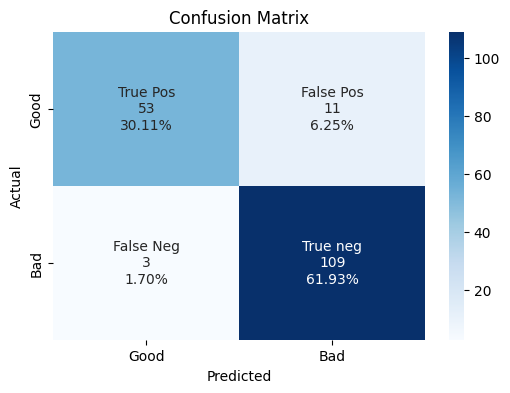

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        64
           1       0.91      0.97      0.94       112

    accuracy                           0.92       176
   macro avg       0.93      0.90      0.91       176
weighted avg       0.92      0.92      0.92       176



In [46]:
#Train - Test split 50-50
MLPClassifier(0.5, [80, 15])

/home/aqeel/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix : 


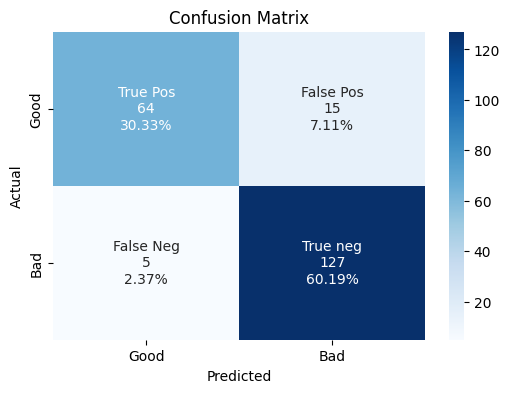

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        79
           1       0.89      0.96      0.93       132

    accuracy                           0.91       211
   macro avg       0.91      0.89      0.90       211
weighted avg       0.91      0.91      0.90       211



In [47]:
#Train - Test split 40-60
MLPClassifier(0.6, [80, 46])

Confusion Matrix : 


/home/aqeel/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


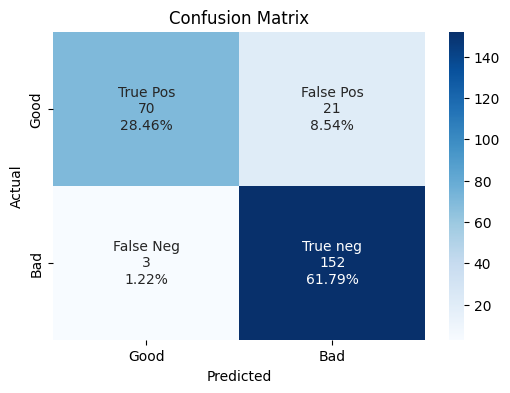

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        91
           1       0.88      0.98      0.93       155

    accuracy                           0.90       246
   macro avg       0.92      0.87      0.89       246
weighted avg       0.91      0.90      0.90       246



In [48]:
#Train - Test split 30-70
MLPClassifier(0.7, [50, 22])

### **split vs accuracy graph**

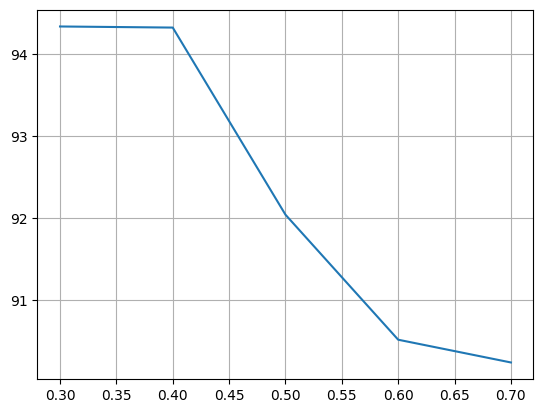

In [49]:
x_points = [float(key) for key in dict_mlp]
y_points = [i*100 for i in dict_mlp.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

In [50]:
def randomForest(split, estimator = 100, criterionValue = 'gini', ):
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = RandomForestClassifier(n_estimators = estimator, criterion = criterionValue)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_rfr):
    dict_rfr[str(split)] = max(accuracy, dict_rfr[str(split)])
    if(str(split) == '0.3' and accuracy > dict_svm[str(split)]):
      RocAucRfr['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_rfr[str(split)] = accuracy
    if(str(split) == '0.3'):
      RocAucRfr['max'] = {'y_test': y_test, 'y_pred': y_pred}

  reports(y_test, y_pred)


Confusion Matrix : 


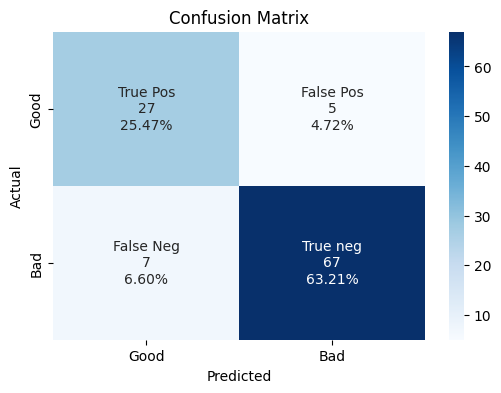

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.93      0.91      0.92        74

    accuracy                           0.89       106
   macro avg       0.86      0.87      0.87       106
weighted avg       0.89      0.89      0.89       106

Confusion Matrix : 


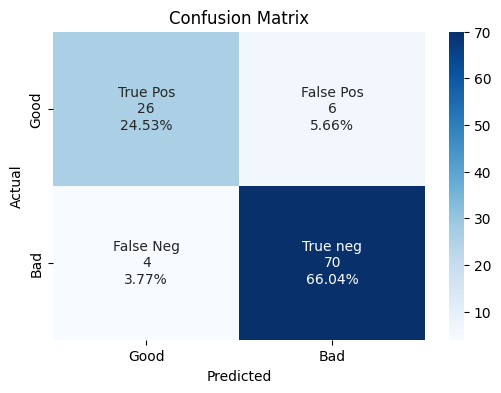

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.92      0.95      0.93        74

    accuracy                           0.91       106
   macro avg       0.89      0.88      0.89       106
weighted avg       0.90      0.91      0.90       106



In [51]:
randomForest(0.3, 170)
randomForest(0.3, 205, 'entropy')

Confusion Matrix : 


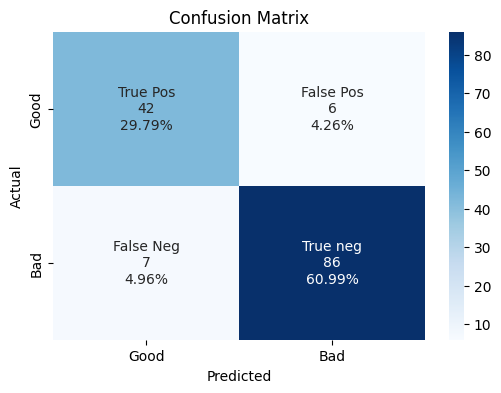

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.93      0.92      0.93        93

    accuracy                           0.91       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.91      0.91      0.91       141

Confusion Matrix : 


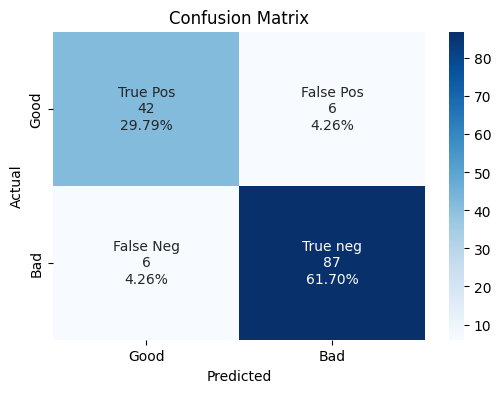

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        48
           1       0.94      0.94      0.94        93

    accuracy                           0.91       141
   macro avg       0.91      0.91      0.91       141
weighted avg       0.91      0.91      0.91       141



In [52]:
randomForest(0.4, 70)
randomForest(0.4, 80, 'entropy')

Confusion Matrix : 


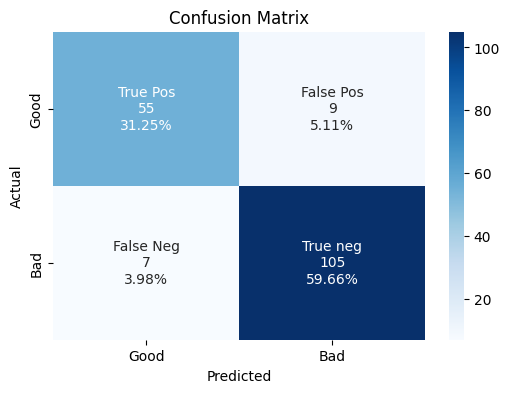

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        64
           1       0.92      0.94      0.93       112

    accuracy                           0.91       176
   macro avg       0.90      0.90      0.90       176
weighted avg       0.91      0.91      0.91       176

Confusion Matrix : 


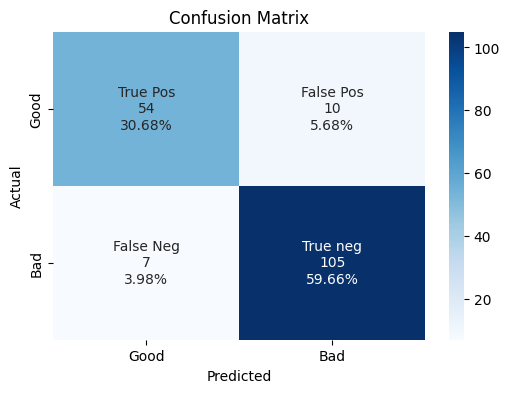

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        64
           1       0.91      0.94      0.93       112

    accuracy                           0.90       176
   macro avg       0.90      0.89      0.89       176
weighted avg       0.90      0.90      0.90       176



In [53]:
randomForest(0.5, 66)
randomForest(0.5, 140, 'entropy')

Confusion Matrix : 


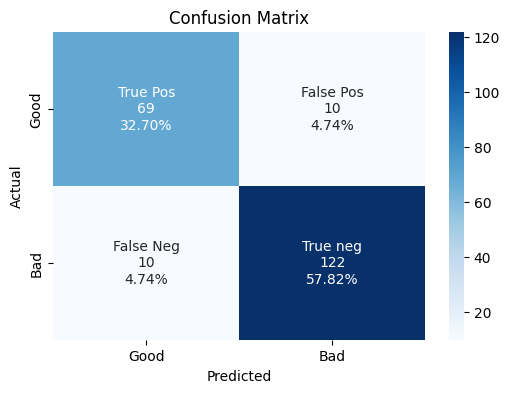

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        79
           1       0.92      0.92      0.92       132

    accuracy                           0.91       211
   macro avg       0.90      0.90      0.90       211
weighted avg       0.91      0.91      0.91       211

Confusion Matrix : 


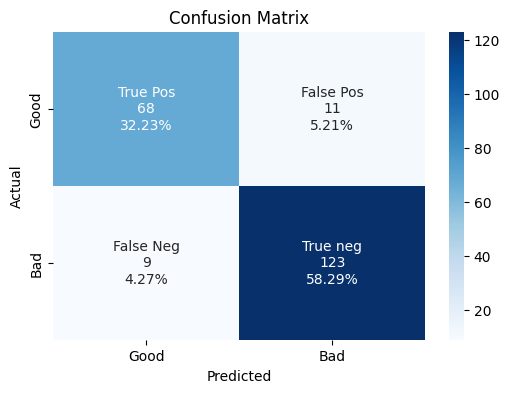

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        79
           1       0.92      0.93      0.92       132

    accuracy                           0.91       211
   macro avg       0.90      0.90      0.90       211
weighted avg       0.90      0.91      0.90       211



In [54]:
randomForest(0.6, )
randomForest(0.6, 100, 'entropy')

Confusion Matrix : 


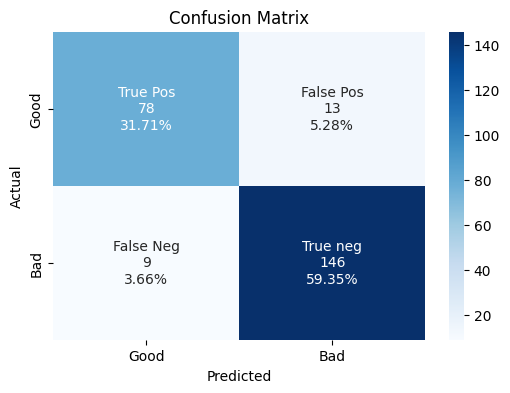

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        91
           1       0.92      0.94      0.93       155

    accuracy                           0.91       246
   macro avg       0.91      0.90      0.90       246
weighted avg       0.91      0.91      0.91       246

Confusion Matrix : 


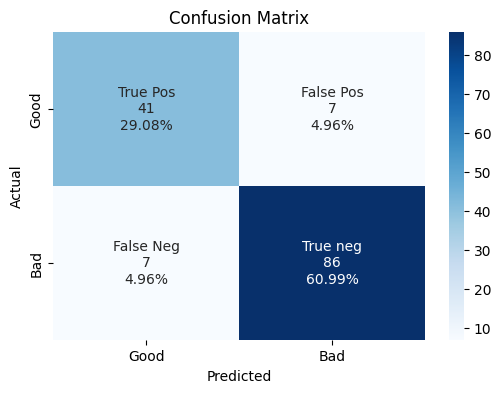

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        48
           1       0.92      0.92      0.92        93

    accuracy                           0.90       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.90      0.90      0.90       141



In [55]:
randomForest(0.7, 120)
randomForest(0.4, 80, 'entropy')

### **split vs accuracy graph**

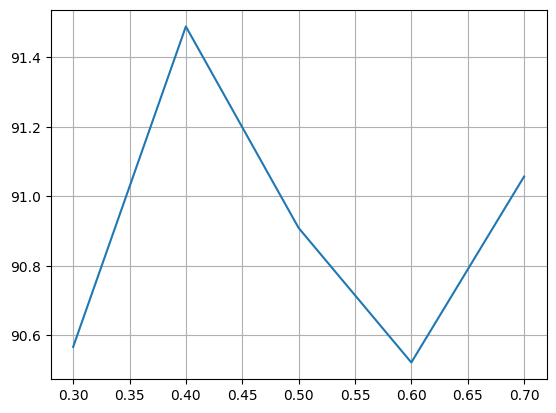

In [56]:
x_points = [float(key) for key in dict_rfr]
y_points = [i*100 for i in dict_rfr.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **ROC curve and ROC_AUC score for all the classifier having maximum accuracy when train test split 70-30.**

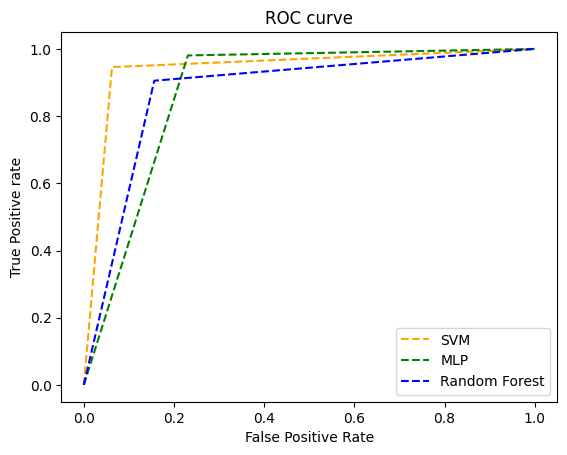

In [57]:
from sklearn import metrics
def auc_roc():
    fpr1, tpr1, _1 = metrics.roc_curve(RocAucSvm['max']['y_test'], RocAucSvm['max']['y_pred'], pos_label=1)
    fpr2, tpr2, _2 = metrics.roc_curve(RocAucMlp['max']['y_test'], RocAucMlp['max']['y_pred'], pos_label=1)
    fpr3, tpr3, _3 = metrics.roc_curve(RocAucRfr['max']['y_test'], RocAucRfr['max']['y_pred'], pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
    plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MLP')
    plt.plot(fpr3, tpr3, linestyle='--', color='blue', label= 'Random Forest')
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show()
auc_roc()

### Using PCA on Random Forest Classifiers

[[ 0.34843328  0.          0.71237237 ... -1.05505394 -0.3122206
  -0.99959483]
 [ 0.34843328  0.          0.72164805 ... -0.11521328 -0.93260505
  -0.08328554]
 [ 0.34843328  0.          0.72164805 ... -0.46409249  0.40444328
  -0.84859079]
 ...
 [ 0.34843328  0.          0.61502805 ...  0.01601615  1.10669878
  -0.04330004]
 [ 0.34843328  0.          0.53267371 ... -0.06586087  1.00526528
  -0.37828012]
 [ 0.34843328  0.          0.41400137 ... -0.12281796  0.9738619
  -0.16248675]]
(351, 10)
--------------------------------------------------------------------------------
Classification report of Random Forest Classifier after PCA (10 components taken):  
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        90
           1       0.90      0.95      0.92       156

    accuracy                           0.90       246
   macro avg       0.90      0.88  

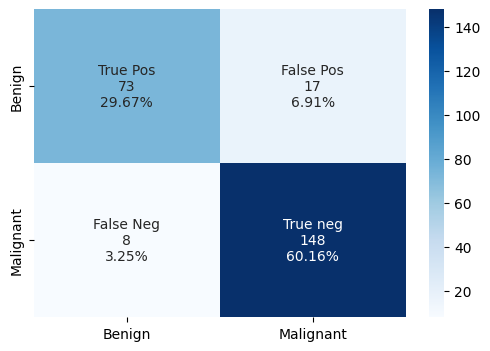

In [58]:
# Standardizing the data (ionosphere dataset is already standardized)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print(X_std)


# Performing PCA
from sklearn.decomposition import PCA

number_of_components = 10  # Number of components to retain (your choice)
pca = PCA(n_components=number_of_components)
transformed_data = pca.fit_transform(X)
print(transformed_data.shape)

## choose train-test split or hyperparameters accordingly
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.7, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, criterion='gini')  # most suitable hyperparameters
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('--------------------------------------------------------------------------------')
print(
  'Classification report of Random Forest Classifier after PCA (' + str(number_of_components) + ' components taken):  ')
print('--------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

print("Confusion Matrix for the same: ")
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 4))
print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'],
                  yticklabels=['Benign', 'Malignant']))

### Using PCA on Support Vector Machines

(351, 12)
--------------------------------------------------------------------------------
Classification report of Random Forest Classifier after PCA (12 components taken):  
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.96      1.00      0.98        67

    accuracy                           0.97       106
   macro avg       0.98      0.96      0.97       106
weighted avg       0.97      0.97      0.97       106

Confusion Matrix for the same: 
Axes(0.125,0.11;0.62x0.77)


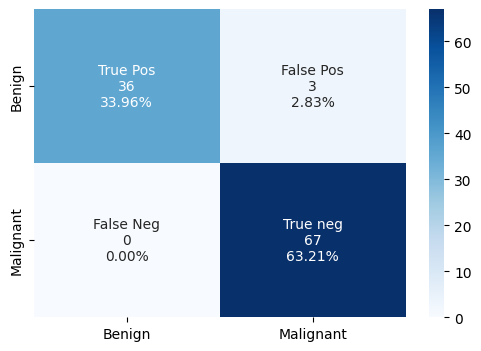

In [59]:
# Performing PCA
from sklearn.decomposition import PCA

number_of_components = 12  # Number of components to retain (your choice)
pca = PCA(n_components=number_of_components)
transformed_data = pca.fit_transform(X)
print(transformed_data.shape)

## choose train-test split or hyperparameters accordingly
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.3, random_state=42)
rfc = SVC(gamma='scale', kernel='rbf', degree=3)  # most suitable hyperparameters
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('--------------------------------------------------------------------------------')
print(
  'Classification report of Random Forest Classifier after PCA (' + str(number_of_components) + ' components taken):  ')
print('--------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

print("Confusion Matrix for the same: ")
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 4))
print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'],
                  yticklabels=['Benign', 'Malignant']))

### Using PCA on Multi Layer Perceptron

(351, 12)
--------------------------------------------------------------------------------
Classification report of Random Forest Classifier after PCA (12 components taken):  
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.96      1.00      0.98        67

    accuracy                           0.97       106
   macro avg       0.98      0.96      0.97       106
weighted avg       0.97      0.97      0.97       106

Confusion Matrix for the same: 
Axes(0.125,0.11;0.62x0.77)


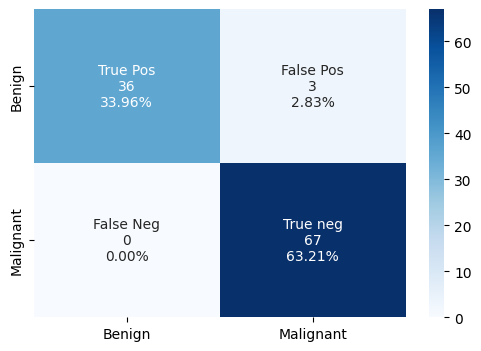

In [60]:
# Performing PCA
from sklearn.decomposition import PCA

number_of_components = 12  # Number of components to retain (your choice)
pca = PCA(n_components=number_of_components)
transformed_data = pca.fit_transform(X)
print(transformed_data.shape)

## choose train-test split or hyperparameters accordingly
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.3, random_state=42)
rfc = SVC(gamma='scale', kernel='rbf', degree=3)  # most suitable hyperparameters
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('--------------------------------------------------------------------------------')
print(
  'Classification report of Random Forest Classifier after PCA (' + str(number_of_components) + ' components taken):  ')
print('--------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

print("Confusion Matrix for the same: ")
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 4))
print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'],
                  yticklabels=['Benign', 'Malignant']))